In [1]:
import os

import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import gym_env
from models import LinearRL, SR_TD

In [2]:
# Set the seed
seed = 1234
np.random.seed(seed)

# Save dir
save_dir = os.path.join('..', 'figures/')

In [34]:
# Define grid field plotting
def visualize_grid_fields(agent, sr, y=8, x=5):
    pca = PCA(n_components=y * x, svd_solver="full")
    result = pca.fit_transform(sr.T)
    result = np.clip(result, 0, 1)

    fig, axs = plt.subplots(x, y, figsize=(y * 3, x * 3))

    for j in range(x):
        for i in range(y):
            axs[j, i].axis("off")
            axs[j, i].imshow(
                result[:, (i + (j * y))].reshape(agent.height, agent.width),
                cmap="jet"
            )
    
    plt.tight_layout()
    plt.show()

In [45]:
# Hyperparams
num_steps = 100000

## Open Field No Goal

### SR Agent

In [46]:
sr_agent = SR_TD(env_name="open-field-no-goal", num_steps=num_steps)

In [47]:
sr_agent.maze.shape

(15, 15)

In [48]:
# agent randomly traverses maze
sr_agent.learn(seed=seed)

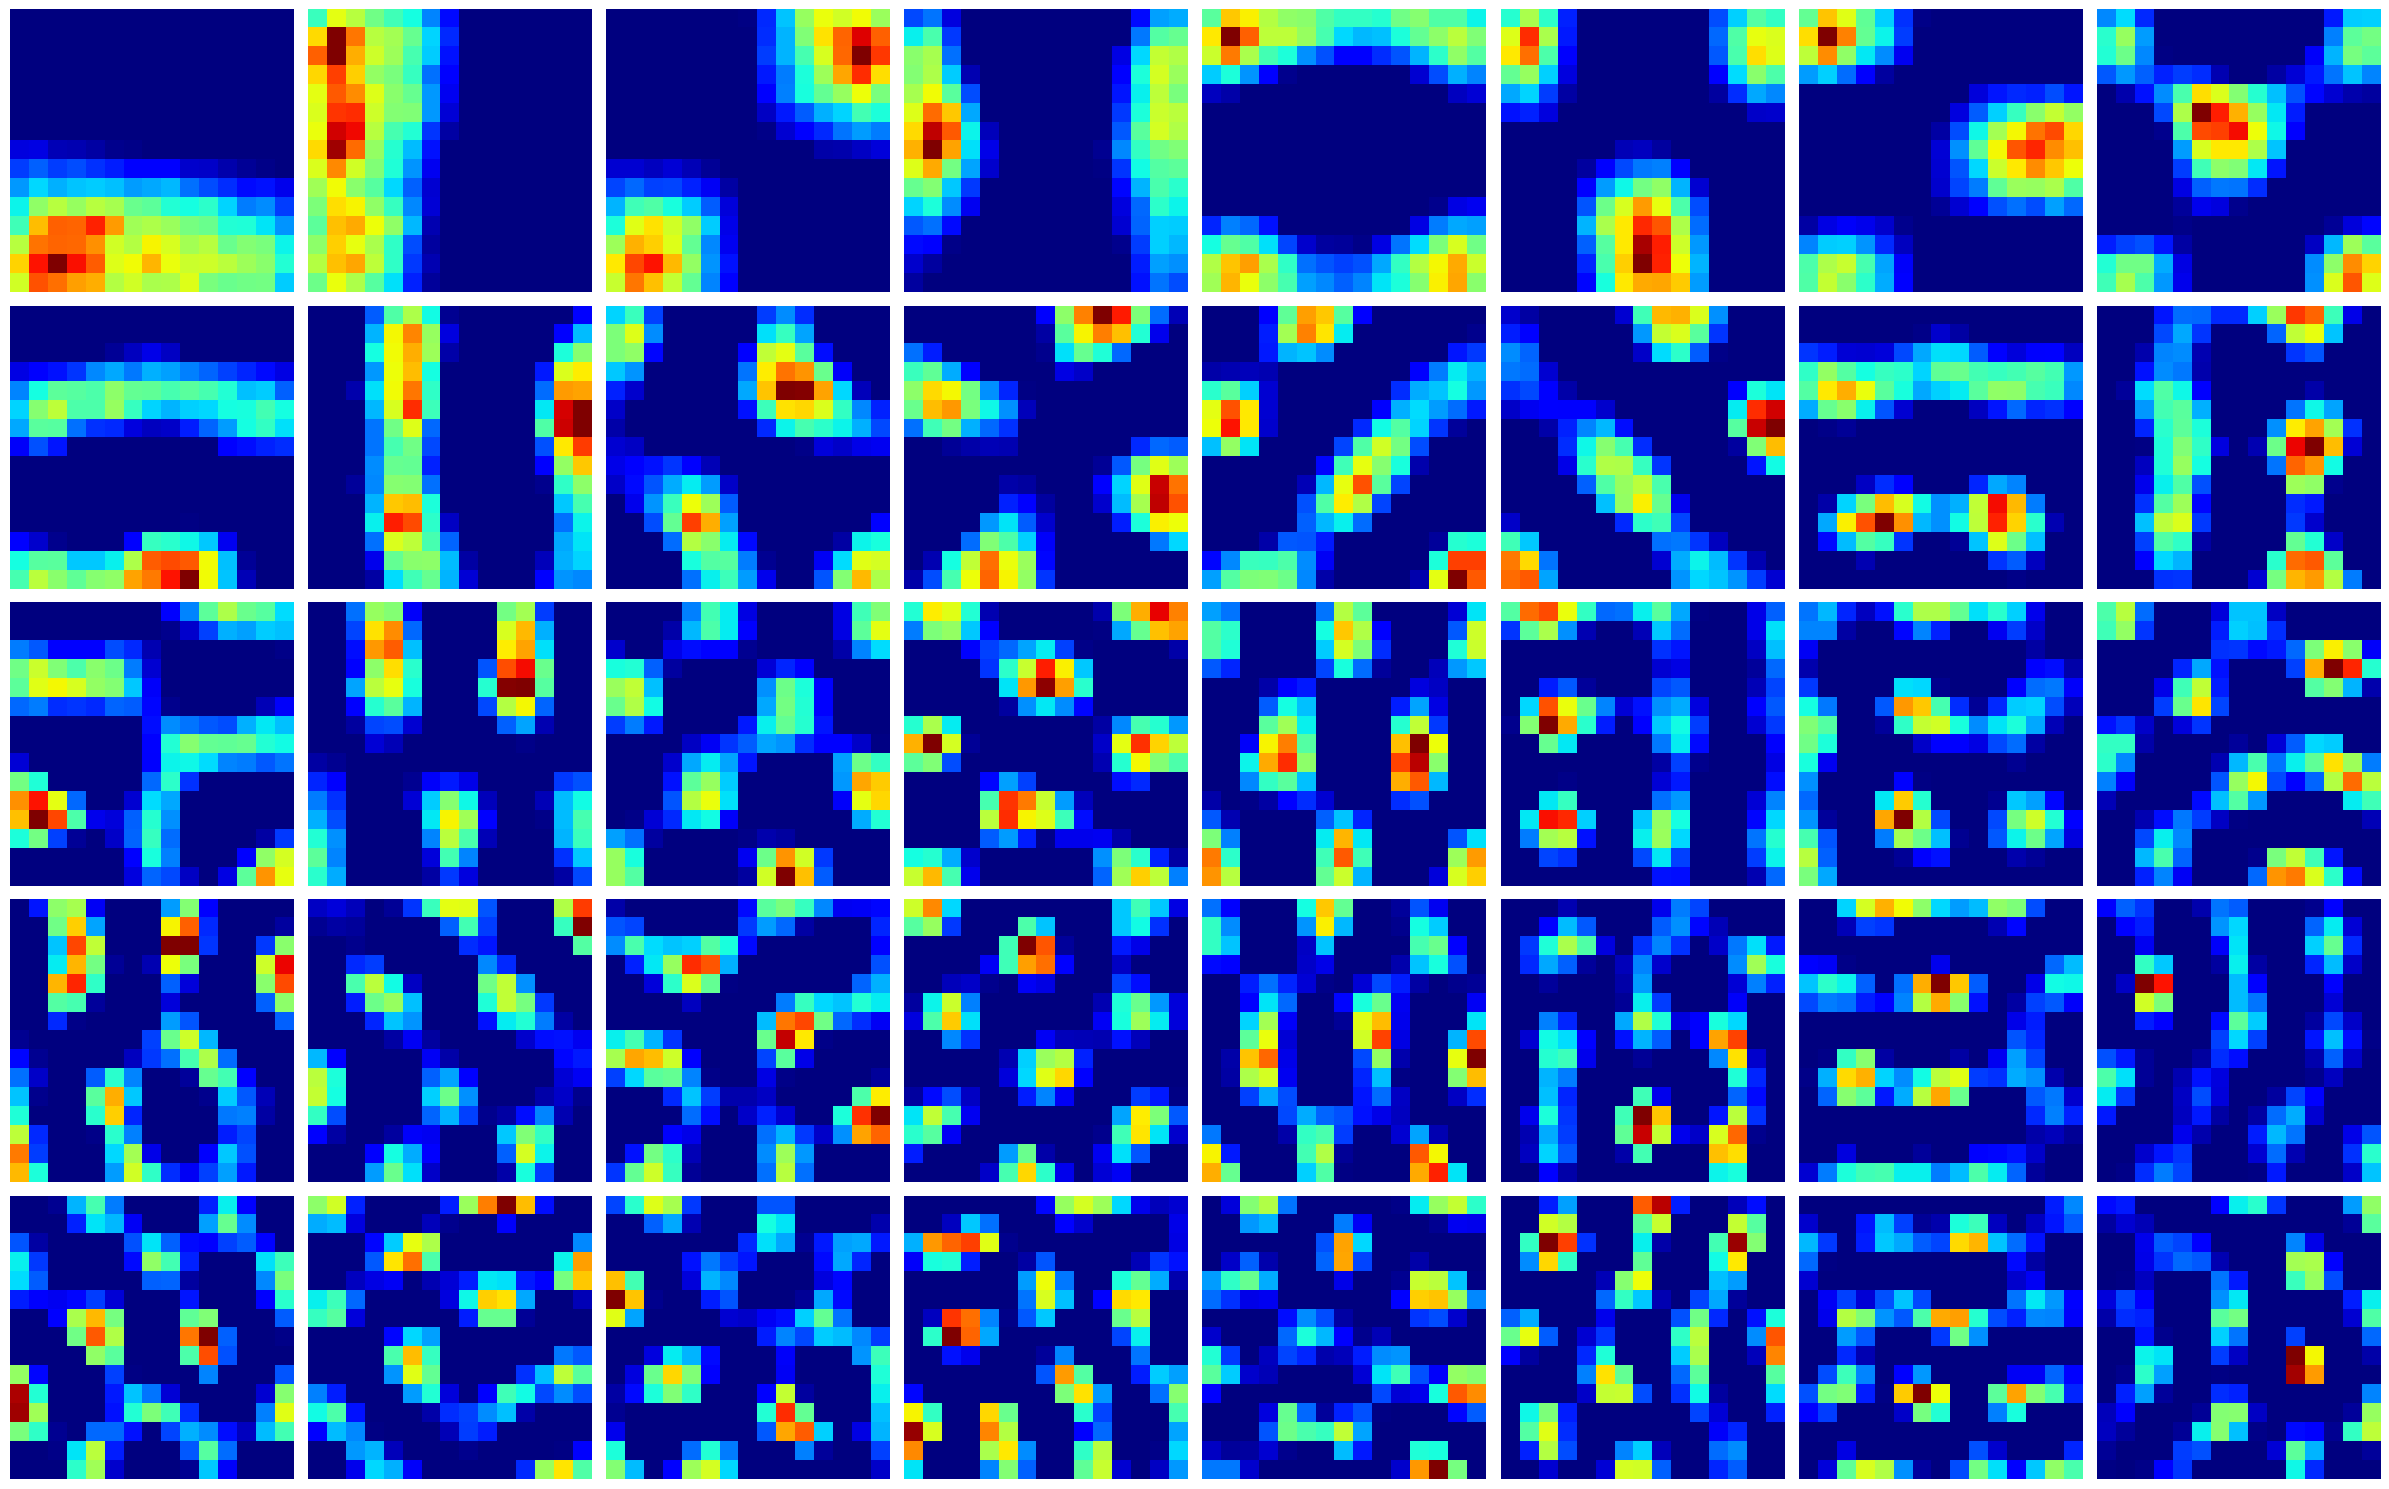

In [49]:
visualize_grid_fields(sr_agent, sr_agent.SR)

### SR-Imp Agent

In [50]:
sr_imp_agent = LinearRL(env_name="open-field-no-goal", num_steps=num_steps)
sr_imp_agent.learn(seed=seed)

/Users/abizzle/Research/LinearRL-TD/src/models.py:235: RuntimeWarning: divide by zero encountered in log
  self.V = np.round(np.log(self.Z), 2)


In [51]:
DR_inv = sr_imp_agent.get_D_inv()

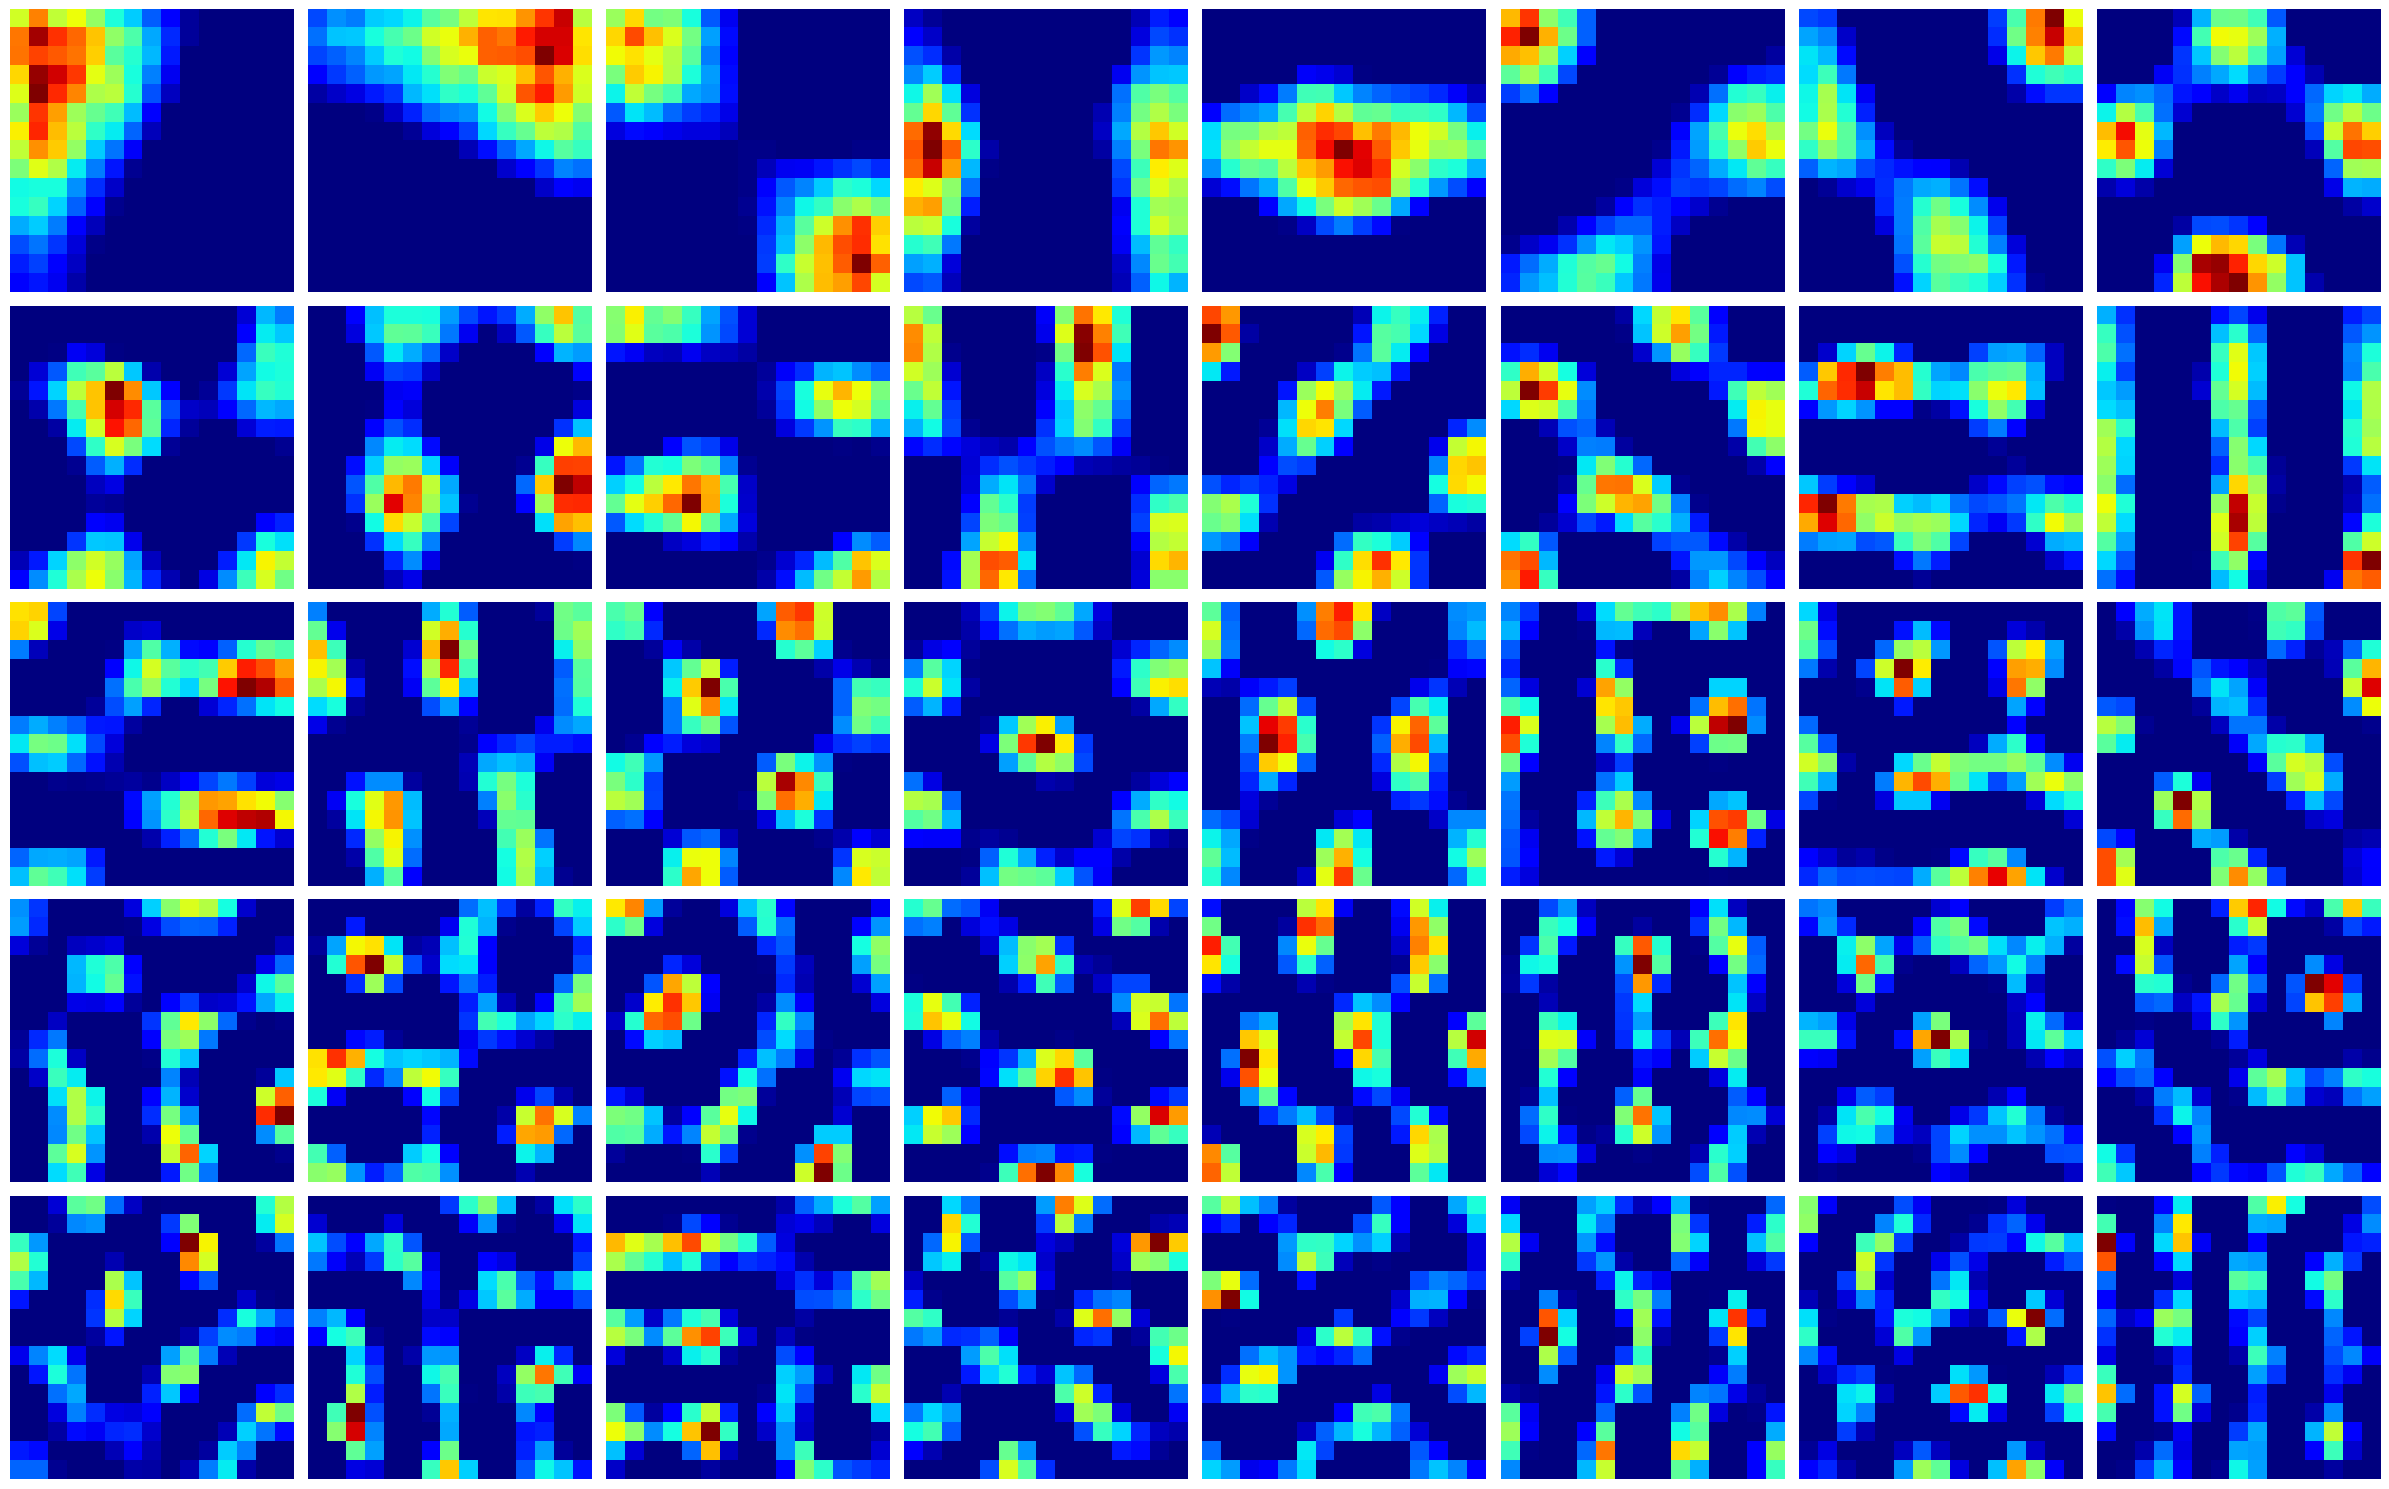

In [52]:
visualize_grid_fields(sr_imp_agent, sr_imp_agent.DR)

### Complete Agent

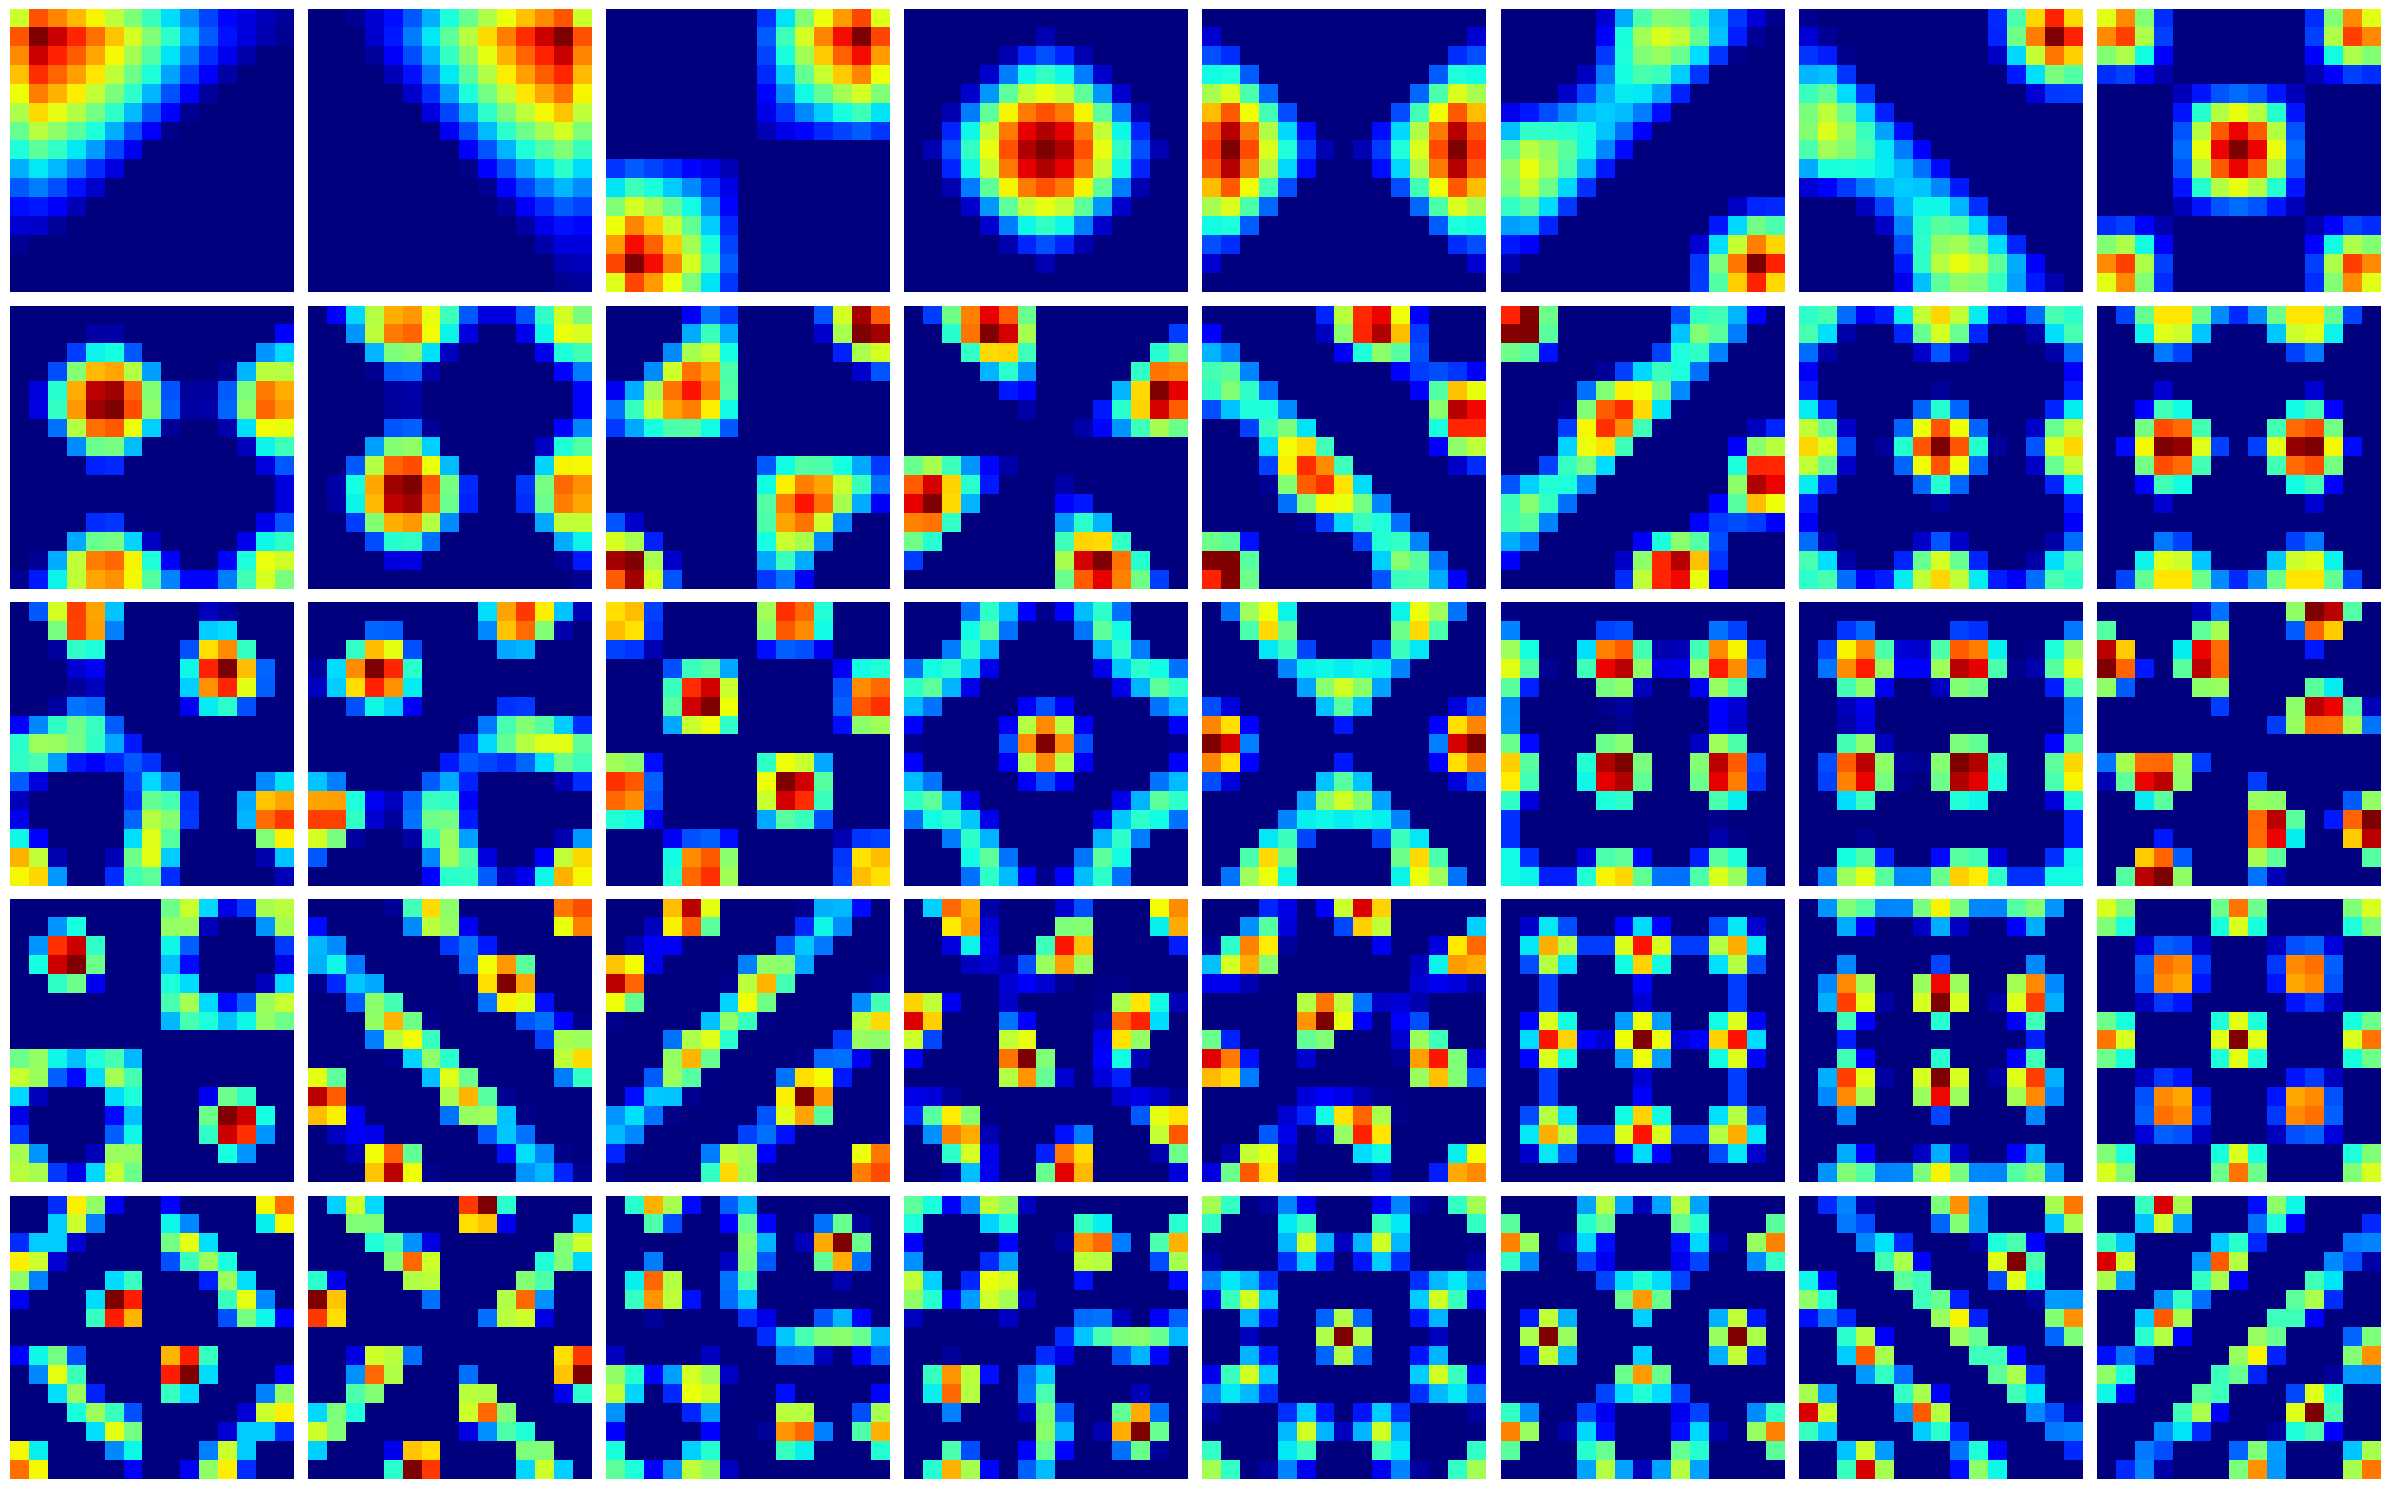

In [42]:
visualize_grid_fields(sr_imp_agent, DR_inv)

## Open Field Center Goal

### SR Agent

In [79]:
sr_agent = SR_TD(env_name="open-field-center-goal", reward=1, term_reward=10, num_steps=200000, policy="softmax")
sr_agent.learn(seed=seed)

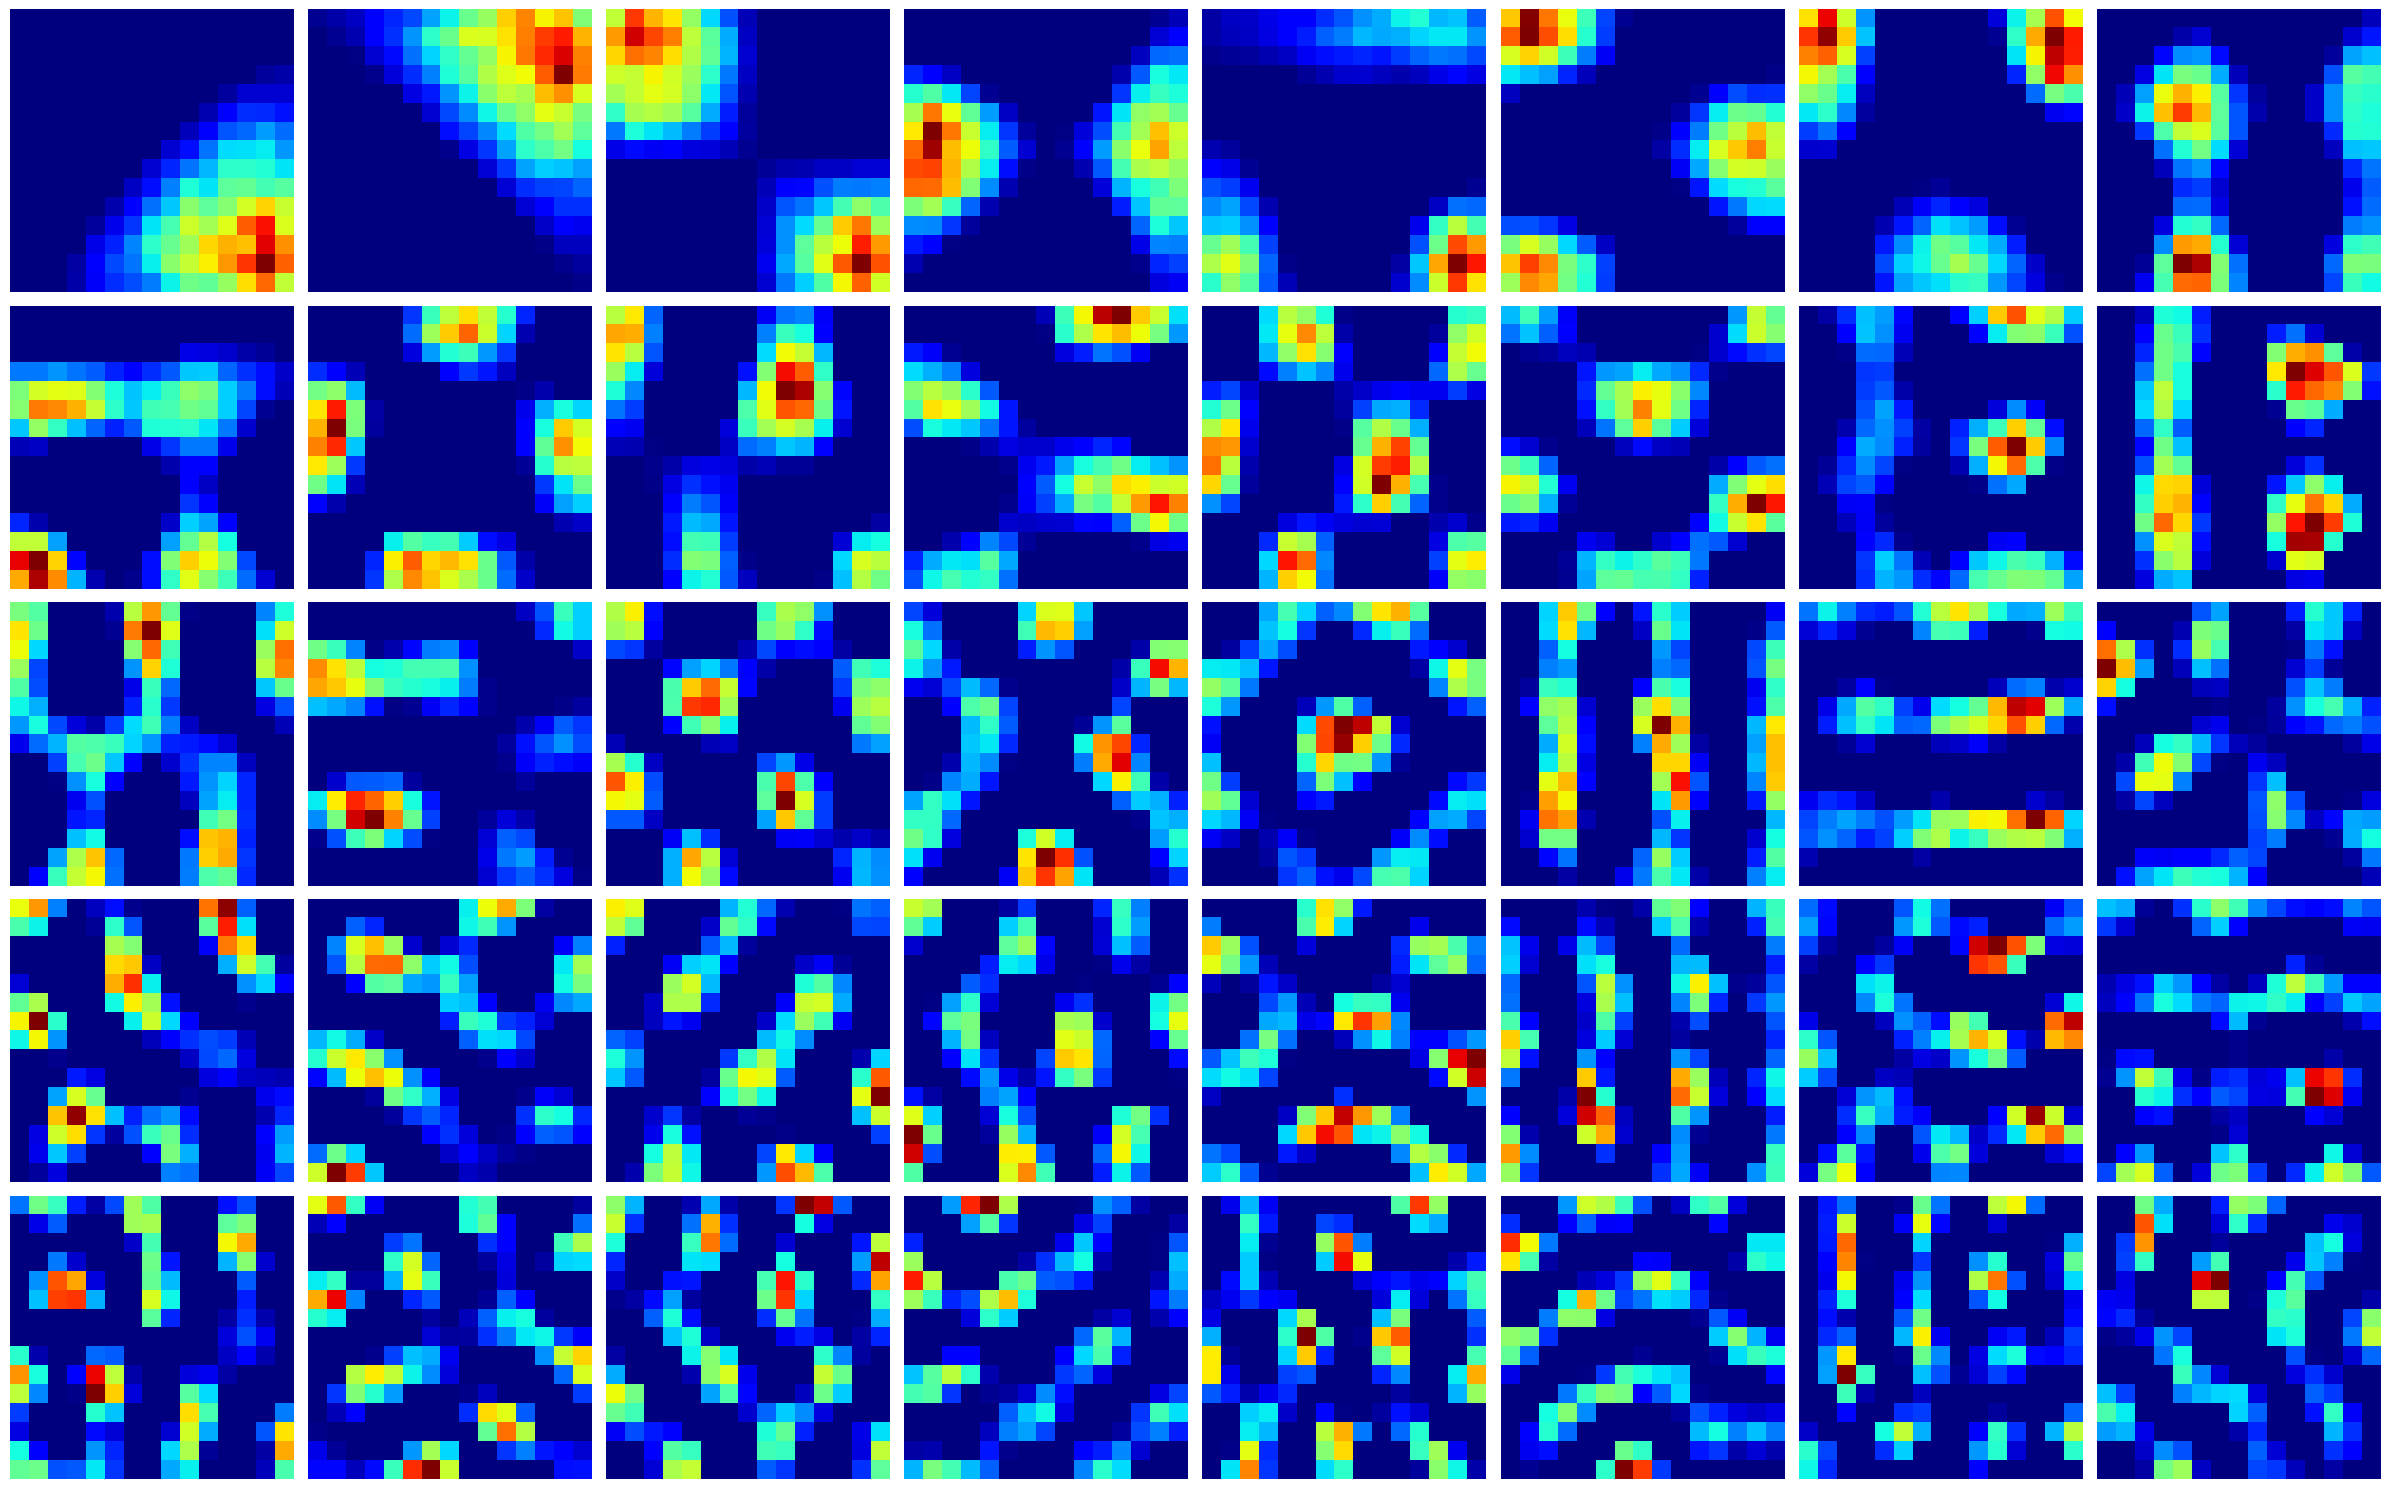

In [80]:
visualize_grid_fields(sr_agent, sr_agent.SR)

### SR-Imp Agent

In [103]:
reward = -0.2
alpha = 0.1
sr_imp_agent = LinearRL(env_name="open-field-center-goal", reward=reward, term_reward=5, alpha=alpha, num_steps=100000, policy="softmax", imp_samp=True)
sr_imp_agent.learn(seed=seed)

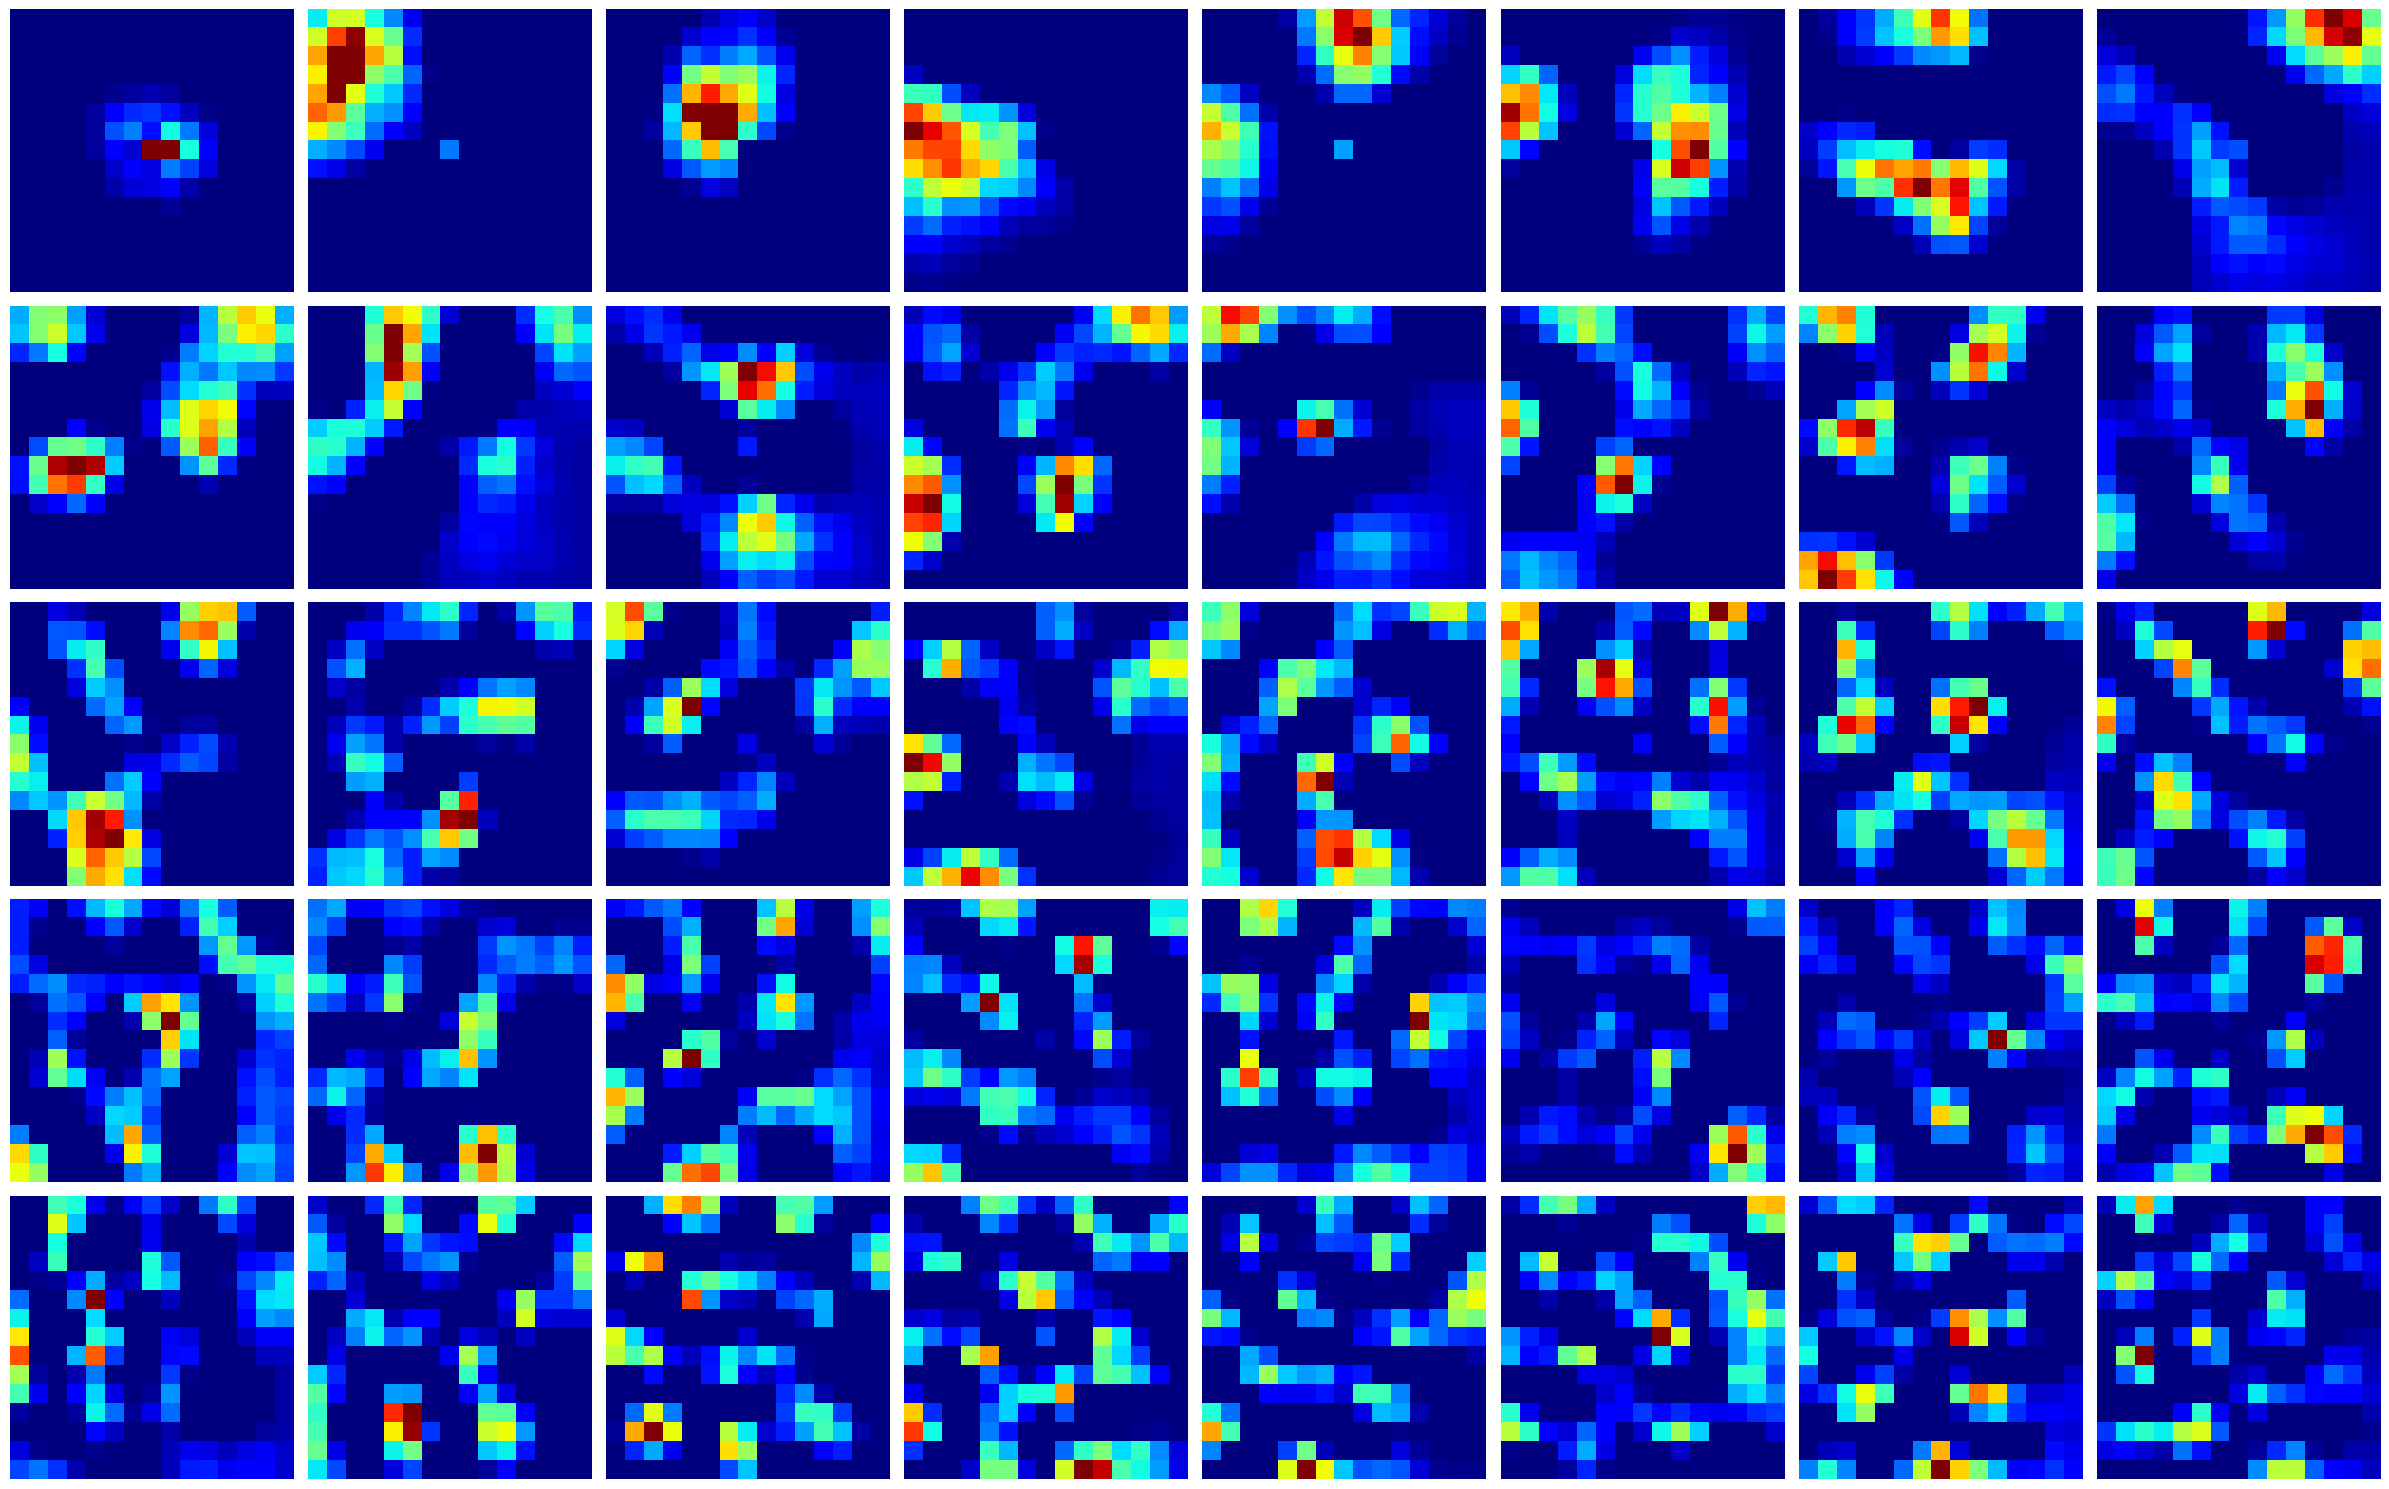

In [104]:
visualize_grid_fields(sr_imp_agent, sr_imp_agent.DR)